In [1]:
import pandas as pd
#from keras.models import load_model
from Settings import *
from Obstacles import *
from Agent import *
from Foods import *
from World import *
import ast
import matplotlib.pyplot as plt
%matplotlib inline
def SetupEnvironment():
    #Add Pictures
    Settings.SetBlockSize(20)
    Settings.AddImage('Wall','Pics/wall.jpg')
    Settings.AddImage('Food','Pics/food.jpg')

    #Specify World Size
    Settings.WorldSize=(11,11)

    #Create Probabilities
    obs = np.zeros(Settings.WorldSize)
    ragnt = np.zeros(Settings.WorldSize)
    gagnt = np.zeros(Settings.WorldSize)
    food = np.zeros(Settings.WorldSize)
    obs[3:8,5] = 1
    ragnt[:,0] =1
    gagnt[:,10]=1
    food[:,4:7]=1
    food[3:8,5] = 0

    #Add Probabilities to Settings
    Settings.AddProbabilityDistribution('Obs',obs)
    Settings.AddProbabilityDistribution('ragnt',ragnt)
    Settings.AddProbabilityDistribution('gagnt',gagnt)
    Settings.AddProbabilityDistribution('food',food)

    #Create World Elements
    obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs')
    food = Foods('Food',PdstName='food')

    ragnt = Agent(Fname='Pics/ragent.jpg',Power=3,VisionAngle=180,Range=-1,PdstName='ragnt',ActionMemory=4)
    gagnt = Agent(Fname='Pics/gagent.jpg',VisionAngle=180,Range=-1,Power=10,ControlRange=1,PdstName='gagnt')
    print(ragnt.ID,gagnt.ID)
    game =World(RewardsScheme=[-10,1000,0.1],StepsLimit=1000)
    #Adding Agents in Order of Following the action
    #game.AddAgents([ragnt])
    game.AddAgents([gagnt,ragnt])
    game.AddObstacles([obs])
    game.AddFoods([food])
    return game


In [2]:
game = SetupEnvironment()

1001 1002


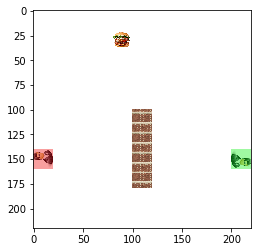

In [26]:
game.GenerateWorld()
game.Step()
plt.imshow(game.BuildImage())
AIAgent = game.agents[1001]
DAgent = game.agents[1002]

In [3]:
x = pd.DataFrame(columns=['Food','Observed',
                          'MyPosition','OponentPosition',
                          'Obestacles','myori',
                          'opori','enemobs',
                          'nactions','FoodObserved',
                          'original_map','game_no'])

# Agents work Randomly

In [ ]:
DAgent,AIAgent = [game.agents[x] for x in game.agents]
counter=0
number_of_games =10000
for game_no in range(number_of_games):
    if counter>=2000000:
        break
    game.GenerateWorld()
    for t in range(1000):
        if counter%1000==0:
            print(counter,game_no)
        AIAgent.RandomAction()
        DAgent.RandomAction()
        game.Step()
        reward = AIAgent.CurrentReward
        #print(reward)
        done = game.Terminated[0]
        #observation, reward, done, info = env.step(action)
        x.loc[counter] = [AIAgent.NNFeed['food'].astype(int16),AIAgent.NNFeed['observed'].astype(int16),
                AIAgent.NNFeed['mypos'].astype(int16),AIAgent.NNFeed['agentpos1002'].astype(int16),
                AIAgent.NNFeed['obstacles'].astype(int16),AIAgent.NNFeed['myori'].astype(int16),
                AIAgent.NNFeed['agentori1002'].astype(int16),DAgent.NNFeed['observed'].astype(int16),
                AIAgent.LastnAction.astype(int16),np.sum(DAgent.NNFeed['food'])>=1,
                game.world,game_no]
        counter+=1
        if done:
            break

0 0
1000 8
2000 11
3000 14
4000 22
5000 26
6000 30
7000 31
8000 35
9000 40
10000 46
11000 50
12000 54
13000 65
14000 67
15000 72
16000 75
17000 78
18000 81
19000 88
20000 94
21000 95
22000 100
23000 104
24000 106
25000 110
26000 114
27000 121
28000 125
29000 126
30000 133
31000 139
32000 143
33000 151
34000 153
35000 156
36000 166
37000 173
38000 183
39000 188
40000 192
41000 194
42000 200
43000 204
44000 208
45000 215
46000 220
47000 229
48000 232
49000 234
50000 240
51000 248
52000 254
53000 262
54000 265
55000 269
56000 270
57000 278
58000 284
59000 285
60000 289
61000 294
62000 296
63000 302
64000 304
65000 305
66000 317
67000 318
68000 320
69000 327
70000 334
71000 337
72000 343
73000 348
74000 352
75000 358
76000 362
77000 368
78000 371
79000 374
80000 376
81000 382
82000 384
83000 391
84000 396
85000 399
86000 405
87000 413
88000 415
89000 420
90000 424
91000 429
92000 433
93000 442
94000 445
95000 450
96000 460
97000 462
98000 464
99000 468
100000 471
101000 476
102000 482
1030

In [23]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [46]:
x.columns

Index(['Food', 'Observed', 'MyPosition', 'OponentPosition', 'Obestacles',
       'myori', 'opori', 'enemobs', 'nactions', 'FoodObserved', 'original_map',
       'game_no'],
      dtype='object')

In [15]:
x.shape

(387, 12)

In [16]:
x.to_csv('supervised_data.csv',index=False)

In [51]:
y = pd.read_csv('supervised_data.csv',converters={'Food':from_np_array})